In [1]:
import glob
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_TM import TM

In [2]:
characters = {}
for file in glob.glob('Data/*.csv'):
    cb = TM()
    cb.unpack(file)
    for row in cb.data.iterrows():
        for character in row[1]:
            if character == '':
                break
            if character in characters:
                characters[character] += 1
            else:
                characters[character] = 1

characters = dict(sorted(characters.items(), key = lambda x: x[1], reverse = True))

In [3]:
edges, weights = [], []
for file in glob.glob('Data/*.csv'):
    cb = TM()
    cb.unpack(file)
    for row in cb.data.iterrows():
        for i in range(1, len(row[1])):
            if row[1][i] == '':
                break
            for j in range(i + 1, len(row[1])):
                if row[1][j] == '':
                    break
                if [row[1][i], row[1][j]] in edges:
                    index = edges.index([row[1][i], row[1][j]])
                    weights[index] += 1
                elif [row[1][j], row[1][i]] in edges:
                    index = edges.index([row[1][j], row[1][i]])
                    weights[index] += 1
                else:
                    edges.append([row[1][i], row[1][j]])
                    weights.append(1)
                    
for i in range(len(edges)):
    edges[i].append({'weight' : weights[i]})
    edges[i] = tuple(edges[i])

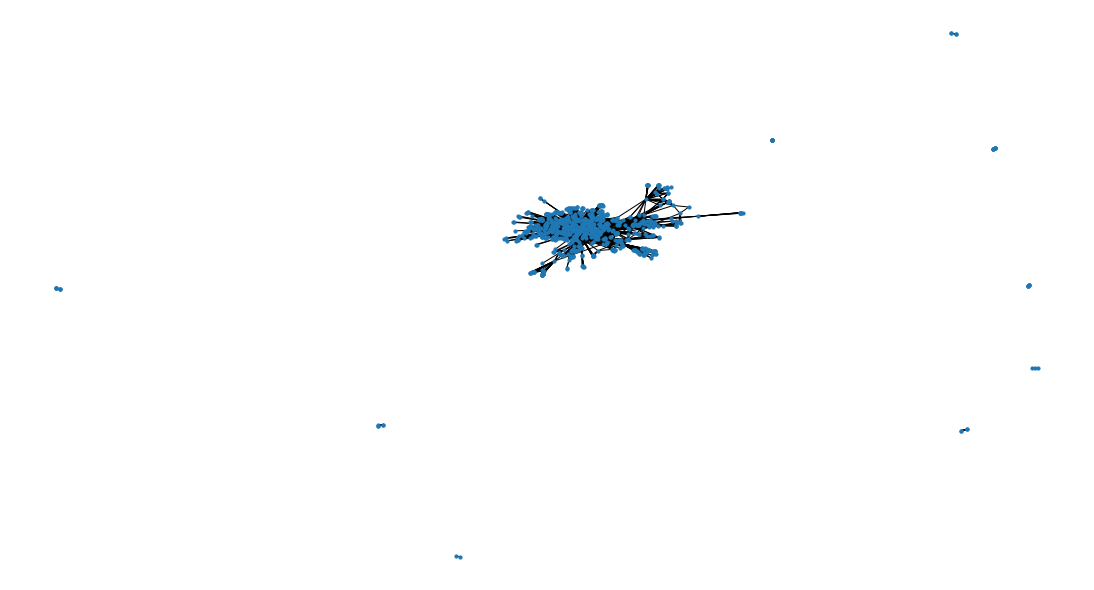

In [4]:
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, k = 0.01)
plt.figure(figsize = (15, 8))
nx.draw(G, pos = pos, node_size = 10)

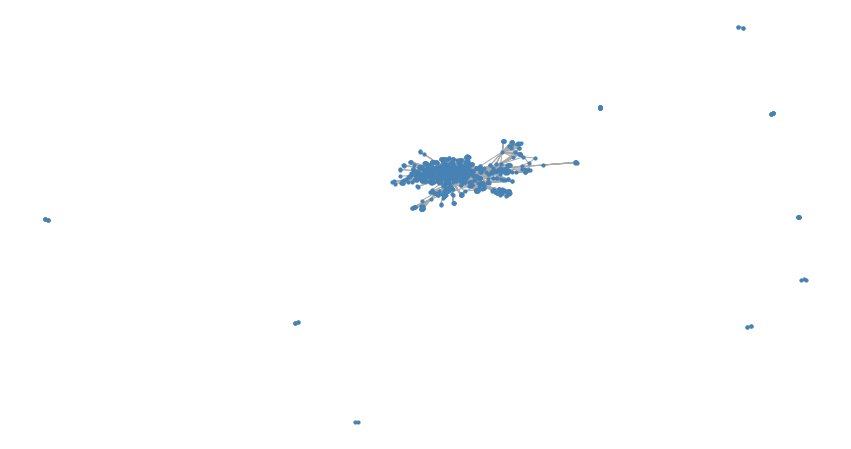

In [5]:
graph_edges = G.edges()
degrees = dict(nx.degree(G))
plt.figure(figsize = (15, 8))

nx.draw_networkx_edges(G,
                       pos = pos,
                       edgelist = graph_edges,
                       width = [G[u][v]['weight'] / 50 for u, v in graph_edges],
                       edge_color = 'darkgray')
nx.draw(G,
        pos = pos,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

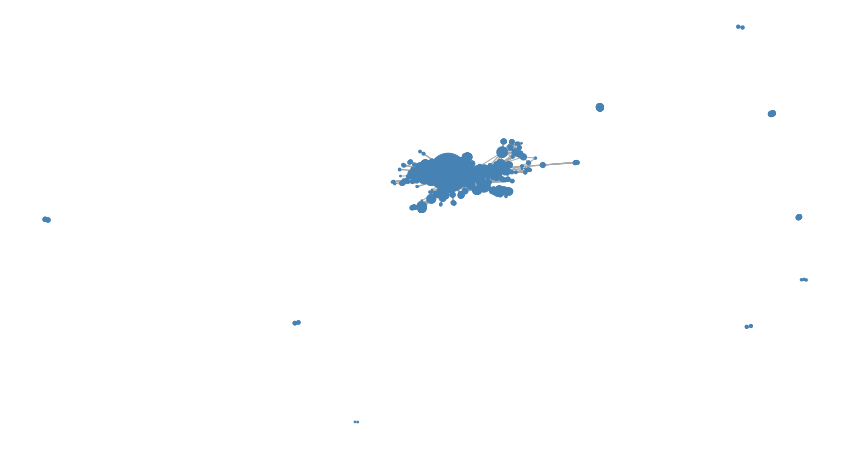

In [6]:
graph_edges = G.edges()
degrees = dict(nx.degree(G))
plt.figure(figsize = (15, 8))

nx.draw_networkx_edges(G,
                       pos = pos,
                       edgelist = graph_edges,
                       width = [G[u][v]['weight'] / 50 for u, v in graph_edges],
                       edge_color = 'darkgray')
nx.draw(G,
        pos = pos,
        node_size = [v * 3 for v in degrees.values()],
        edge_color = 'darkgray',
        node_color = 'steelblue')

# plt.savefig('..\TeX\img\graph.png')

In [7]:
len(G.nodes())

1015

In [8]:
len(G.edges())

6615

In [9]:
H = nx.subgraph(G, list(nx.connected_components(G))[0])

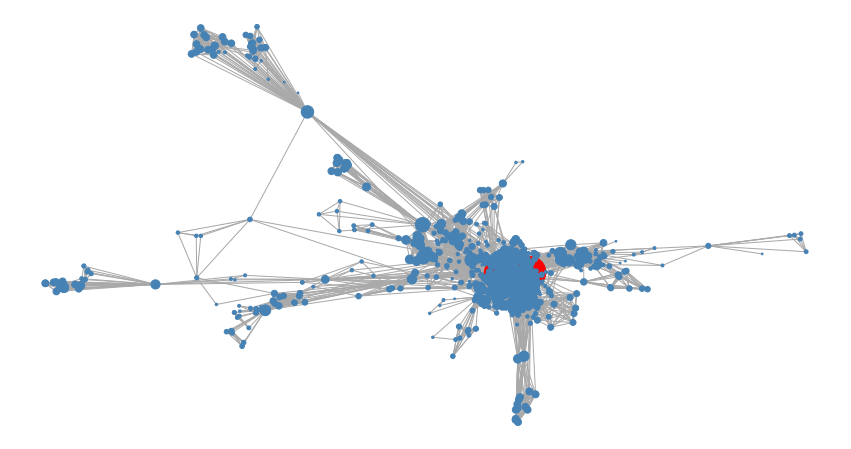

In [10]:
pos = nx.spring_layout(H, k = 0.001)
plt.figure(figsize = (15, 8))

principal = ['Mônica', 'Cebolinha', 'Cascão', 'Magali']
node_color = []
degrees = dict(nx.degree(H))
graph_edges = H.edges()

for node in H.nodes():
    if node in principal:
        node_color.append('red')
    else:
        node_color.append('steelblue')

nx.draw_networkx_edges(H,
                       pos = pos,
                       edgelist = graph_edges,
                       width = [H[u][v]['weight'] / 50 for u, v in graph_edges],
                       edge_color = 'darkgray')
        
nx.draw(H,
        pos = pos,
        node_color = node_color,
        edge_color = 'darkgray',
        node_size = [v * 3 for v in degrees.values()])

# plt.savefig('..\TeX\img\graph2.png')